In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
(len(input_train), len(input_test))

(25000, 25000)

In [2]:
input_train = sequence.pad_sequences(input_train, maxlen)
input_test = sequence.pad_sequences(input_test, maxlen)
input_train.shape

(25000, 500)

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(max_features, batch_size))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['acc']
)

In [8]:
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 75s 480ms/step - loss: 0.3227 - acc: 0.8713 - val_loss: 0.4313 - val_acc: 0.8358
Epoch 2/10
157/157 [==============================] - 80s 509ms/step - loss: 0.2471 - acc: 0.9048 - val_loss: 0.4653 - val_acc: 0.8338
Epoch 3/10
157/157 [==============================] - 77s 491ms/step - loss: 0.1922 - acc: 0.9298 - val_loss: 0.7375 - val_acc: 0.7450
Epoch 4/10
157/157 [==============================] - 68s 430ms/step - loss: 0.1391 - acc: 0.9513 - val_loss: 0.3811 - val_acc: 0.8604
Epoch 5/10
157/157 [==============================] - 70s 446ms/step - loss: 0.0916 - acc: 0.9693 - val_loss: 0.5104 - val_acc: 0.8486
Epoch 6/10
157/157 [==============================] - 75s 476ms/step - loss: 0.0563 - acc: 0.9823 - val_loss: 0.5462 - val_acc: 0.8072
Epoch 7/10
157/157 [==============================] - 69s 439ms/step - loss: 0.0390 - acc: 0.9886 - val_loss: 0.5424 - val_acc: 0.8328
Epoch 8/10
157/157 [==============================] - 7

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(1, len(acc) + 1)
    
    plt.plot(epochs, acc, 'bo', label="Training accuracy")
    plt.plot(epochs, val_acc, 'r', label="Validation accuracy")
    plt.title("Training and Validation accuracy")
    plt.legend()
    plt.figure()
    
    plt.plot(epochs, loss, 'bo', label="Training Loss")
    plt.plot(epochs, val_loss, 'r', label="Validation Loss")
    plt.legend()
    
    plt.show()

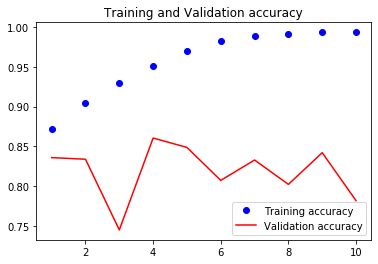

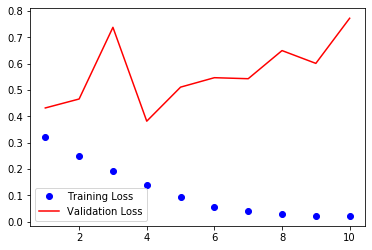

In [10]:
plot(history)

In [11]:
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['acc']
)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8320      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [13]:
history = model.fit(input_train, y_train, validation_split=0.2, epochs=15, batch_size=128)

Epoch 1/15
157/157 [==============================] - 5s 31ms/step - loss: 0.2632 - acc: 0.9014 - val_loss: 0.3438 - val_acc: 0.8752
Epoch 2/15
157/157 [==============================] - 5s 31ms/step - loss: 0.2200 - acc: 0.9200 - val_loss: 0.3002 - val_acc: 0.8848
Epoch 3/15
157/157 [==============================] - 5s 31ms/step - loss: 0.1903 - acc: 0.9317 - val_loss: 0.2965 - val_acc: 0.8794
Epoch 4/15
157/157 [==============================] - 5s 31ms/step - loss: 0.1674 - acc: 0.9391 - val_loss: 0.2993 - val_acc: 0.8880
Epoch 5/15
157/157 [==============================] - 5s 31ms/step - loss: 0.1525 - acc: 0.9451 - val_loss: 0.3043 - val_acc: 0.8838
Epoch 6/15
157/157 [==============================] - 5s 31ms/step - loss: 0.1412 - acc: 0.9509 - val_loss: 0.3178 - val_acc: 0.8830
Epoch 7/15
157/157 [==============================] - 5s 31ms/step - loss: 0.1244 - acc: 0.9575 - val_loss: 0.3227 - val_acc: 0.8742
Epoch 8/15
157/157 [==============================] - 5s 31ms/step - 

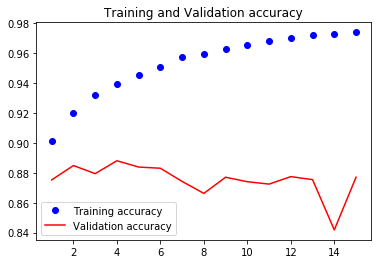

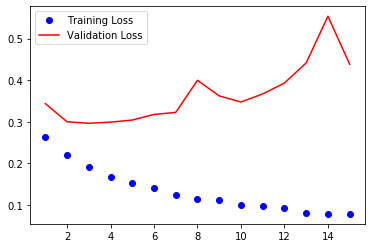

In [14]:
plot(history)

Before overfitting, the model had an accuracy of 88%. 
We need to understand more in order to increase accuracy
Its not like CNN, where there was dramatic increase by just adding a CNN


Also visualize an LSTM neuron to take (input, state, output) as parameter to calculate carryState for next neuron
RNNs have two weight matrices for (input, state)
LSTM RNNs have three weight matrices for (input, state, output)

As you can guess, it is much more expensive to train. 

In [2]:
#  IT CRASHED WITH THE NEXT TRY

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout
model = Sequential()

model.add(Embedding(max_features, batch_size))
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['acc']
)

history = model.fit(
    input_train, y_train, epochs=10, batch_size=128, validation_split=0.2
)


In [ ]:
plot(history)